In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import glob, os
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [5]:
# load an audio file
filename = "114512"

audio_file = filename + ".wav"

ipd.Audio (audio_file)

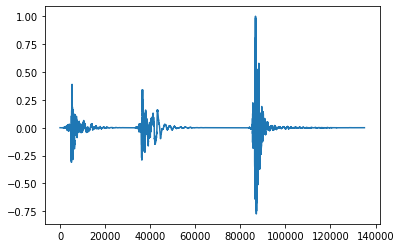

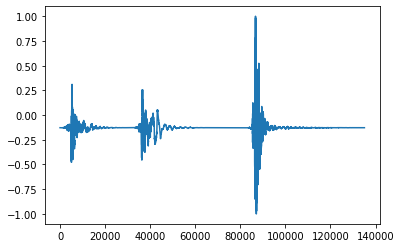

In [6]:
signal_raw, sr = librosa.load (audio_file)
#Normalized in (-1,1)
signal = (1+1)*(signal_raw-min(signal_raw))/(max(signal_raw)-min(signal_raw))-1

plt.figure()
plt.plot (signal_raw)
plt.figure()
plt.plot (signal)

In [7]:
# Number of images
n= len(signal)/sr
print (n)

window = 0.5*sr
slide  = 0.1*sr
N = 1+ (n-0.5)/0.1
N = int(N)
window = int(window)
slide = int(slide)
print (type(N))
print (N)


#i=1
#signal_w = signal[0+i*slide:window+i*slide]
#y = signal_w
#sr = sr

for i in range (0,N):
    signal_w = []
    signal_w = signal[0+i*slide:window+i*slide]
    S = np.abs(librosa.stft(signal_w,n_fft=256))
    D = librosa.amplitude_to_db(S, ref=np.max)
    fname = filename + "_" + str(i) + '.JPG'
    plt.imsave(fname, D)
 
print (D.shape)





6.125170068027211
<class 'int'>
57
(129, 173)


In [40]:
data_path = "Audio/18Walkorfootstep/"
stft_path = "DecomFrames/18Walkorfootstep/"
duration = 2

In [41]:
# Extract one frame per audio
for aud in glob.glob(data_path + '*.wav'):
    filename = aud.split('.')[0].split('/')[-1]
    signal_raw, sr = librosa.load(aud, duration=duration)
    num_samples = int(sr * duration)
    num_missing_samples = num_samples - len(signal_raw)
    if len(signal_raw) > num_samples:
        signal_raw = signal_raw[num_samples]
    if len(signal_raw) < num_samples:
        signal_raw = np.pad(signal_raw, (0, num_missing_samples), mode="constant")
    S = np.abs(librosa.stft(signal_raw,n_fft=512, hop_length=128))
    stft = librosa.amplitude_to_db(S, ref=np.max)
    fname = filename + "_" + '.jpg'
    plt.imsave(stft_path + fname, stft)

In [84]:
data_path = "Audio/20Writing/"
stft_path = "DecomFrames/20Writing/"

In [85]:
# Decomposite multiple frames per audio
for aud in glob.glob(data_path + '*.wav'):
    filename = aud.split('.')[0].split('/')[-1]
    signal_raw, sr = librosa.load(aud, duration=duration)
    n_samples = len(signal_raw)/sr
    window = 0.5*sr
    slide  = 0.1*sr
    N = 1+ (n_samples-0.5)/0.1
    N = int(N)
    window = int(window)
    slide = int(slide)
    for i in range (0,N):
        signal_w = []
        signal_w = signal_raw[0+i*slide:window+i*slide]
        S = np.abs(librosa.stft(signal_w,n_fft=256))
        D = librosa.amplitude_to_db(S, ref=np.max)
        fname = filename + "_" + str(i) + '.jpg'
        plt.imsave(stft_path + fname, D)
    